# Problem 13 - Polynomial Multiplication using FFT

In [116]:
from scipy.fft import fft, ifft
import numpy as np
import time
import matplotlib.pyplot as plt
from cmath import exp, pi, rect

In [117]:
def polynom(coeffs, x): 
    """calculate a polynom of type c_0 + c_1 * x^1 + c_2 * x^3 + ...c_n * x^n

    Args:
        coeffs (array-like): list or array of coefficients c0 ... cn
        x (array-like): list of x values to compute

    Returns:
        (array): result of the polynom
    """    
    if hasattr(x, "__len__"):
        return np.array([polynom(coeffs, x_i) for x_i in x])
    return sum([coeffs[i]*x**i for i in range(len(coeffs))])


def regular_multiplication(a_coeffs, b_coeffs):
    return np.polymul(a_coeffs, b_coeffs)


max error: 1.4210854715202004e-14
fft coeffs:  [3.00000000e+00 8.00000000e+00 1.50000000e+01 1.00000000e+01
 6.00000000e+00 4.57349131e-16 4.27017195e-16 2.42407049e-16
 1.06898514e-15 1.18798538e-15]
regular coeffs:  [ 3  8 15 10  6]


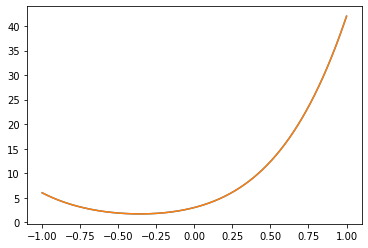

In [118]:
resolution = 1000
n = 100 # order of the polynom - 1
x_vals = np.linspace(-1, 1, resolution)
a_coeffs = [1 for i in range(n)] #a(x) = sum(x^i)
b_coeffs = [i for i in range(n)] #b(x) = sum(i*x^i)
a_coeffs = [1,2,3]
b_coeffs = [3,2,2]

start_regular = time.time()
c_coeffs_regular = regular_multiplication(a_coeffs, b_coeffs)
end_regular = time.time()


# The procuct of two polynoms of degree n is 2n. Therefore we need to append some zeroes make the algorithm work
a_coeffs += [0 for i in range(n)]
b_coeffs += [0 for i in range(n)]

# Perfomr point-wise multiplication in Fourier Space
start_fft = time.time()
A_vals = fft(a_coeffs)
B_vals = fft(b_coeffs)
C_vals = A_vals*B_vals
c_coeffs_fast = abs(ifft(C_vals))
end_fft = time.time()

poly_c_regular = polynom(c_coeffs_regular, x_vals)
poly_c_fast = polynom(c_coeffs_fast, x_vals)
max_err = abs(poly_c_regular - poly_c_fast).max()


print("max error:", max_err)
print("fft coeffs: ", c_coeffs_fast[:10])
print("regular coeffs: ", c_coeffs_regular[:5])
plt.plot(x_vals, poly_c_regular, label="regular")
plt.plot(x_vals, poly_c_fast, label="fft")
plt.show()

# Problem 15 - Numerical Integration using Newton-Cotes

In [119]:
import numpy as np
from math import exp, sqrt
import matplotlib.pyplot as plt

# Functions to Integrate
def f1(x): return exp(x)
def f2(x): return sqrt(x)

# Analtitic results for functions to integrate
def I_f1_analytic(a, b): return exp(b) - exp(a)
def I_f2_analytic(a, b): return 2.0 / 3.0 * (b**(3/2) - a**(3/2))


# rules are transposed in respect to the exercise sheet
# [[c0, ... cn], [w0, ..., wn]]
trapezoidal =   [[0, 1], [0.5, 0.5]]
simpson =       [[0, 0.5, 1], [1.0/6.0, 2.0/3.0, 1.0/6.0]]
mid_point =     [[0.5], [1]]
double_gauss =  [[0.5 - 0.5/sqrt(3.0), 0.5 + 0.5/sqrt(3.0)], [0.5, 0.5]]

rule_list = [trapezoidal, simpson, mid_point, double_gauss]
rule_labels = ["trapezoidal","simpson","mid_point","double_gauss"]

In [120]:
def integrate(f, a, b, m, rule):
    """ Integrate by summing up sub-intervals 
    sub-intervals are calculated using newton-cotes

    Args:
        f (fucntion): function to integrate
        a (float): lower bound
        b (float): upper bound
        m (int): number of subintervals used for integration
        rule ([[], []]): rules as defined above

    Returns:
        float: Numerical value of the integration
    """    
    x = np.linspace(a,b,m+1) # create m subintervals
    return sum( [integrate_subinterval(f, x[i], x[i+1], rule[0], rule[1]) for i in range(len(x)-1)] )


# Algorithm for integrating 1 sub-interval accoring to Dahmen 10.13
def integrate_subinterval(f, a, b, c, w):
    h = b - a
    return h*sum([w[j] * f(a + c[j]*h) for j in range(len(w))])


In [121]:
def study_convergence(f, f_analytic, m_max, title):
    a = 0
    b = 1
    plt.figure(figsize=(7,7))

    for i in range(len(rule_list)):
        err = [abs(integrate(f, a, b, m, rule_list[i]) - f_analytic(a, b)) for m in range(m_max)]
        plt.plot(err, label=rule_labels[i])

    plt.yscale("log")
    plt.title(title)
    plt.xlabel("number of subintervals m")
    plt.ylabel("Absolute Error")
    plt.legend()
    plt.show()
 

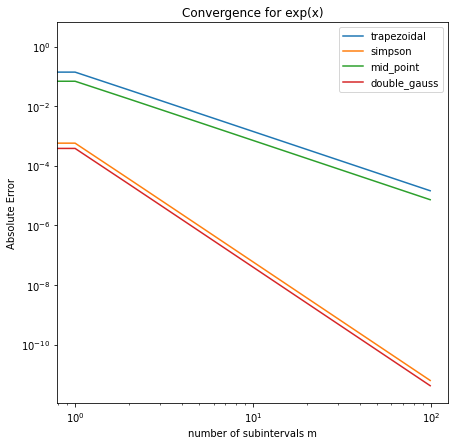

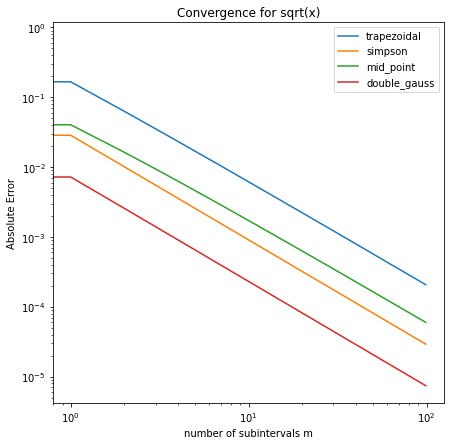

In [122]:
study_convergence(f1, I_f1_analytic, 100, "Convergence for exp(x)")
study_convergence(f2, I_f2_analytic, 100, "Convergence for sqrt(x)")